In [ ]:
# Coca-Cola Stock Intelligence 
### Predictive Analysis and Strategic Insights using ML & Financial Indicators

1.Objective:  
This project explores historical Coca-Cola (KO) stock data to derive financial insights, engineer meaningful features, and build ML models to forecast stock prices. Additionally, it applies backtesting strategies to simulate trading performance.

2. Tools Used:** Python, Pandas, Matplotlib, Seaborn, Scikit-Learn, YFinance, Finta, Plotly, Streamlit

3.Datasets:**
- Coca-Cola_stock_history.csv
- Coca-Cola_stock_info.csv


In [75]:

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Displaying settings
pd.set_option('display.max_columns', None)
%matplotlib inline

# Loading datasets
history_df = pd.read_csv(r"C:\Users\karti\Downloads\Coca Cola Stock - Live and Updated-20250625T081707Z-1-001\Coca Cola Stock - Live and Updated\Coca-Cola_stock_history.csv")
info_df = pd.read_csv(r"C:\Users\karti\Downloads\Coca Cola Stock - Live and Updated-20250625T081707Z-1-001\Coca Cola Stock - Live and Updated\Coca-Cola_stock_info.csv", header=None, names=["Description", "Information"])

# Quick look
print("History data:")
display(history_df.head())

print("Info data:")
display(info_df.head())



# Standardizing column names
history_df.columns = history_df.columns.str.strip().str.replace(" ", "_")

# Convert 'Date' to datetime
history_df['Date'] = history_df['Date'].str.split().str[0]  
history_df['Date'] = pd.to_datetime(history_df['Date'])     

# Sort data
history_df.sort_values(by='Date', inplace=True)
history_df.reset_index(drop=True, inplace=True)

# Clean info_df (drop empty or invalid rows)
info_df.dropna(inplace=True)
info_df = info_df[info_df["Information"] != 'nan']

# Show structure
history_df.info()


# Moving averages
history_df["MA_20"] = history_df["Close"].rolling(window=20).mean()
history_df["MA_50"] = history_df["Close"].rolling(window=50).mean()

# Daily return
history_df["Daily_Return"] = history_df["Close"].pct_change()

# Volatility
history_df["Volatility"] = history_df["Daily_Return"].rolling(window=20).std()

# Drop rows with missing values due to rolling
history_df.dropna(inplace=True)

history_df.tail()




History data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


Info data:


,Description,Information
0,Key,Value
1,zip,30313
2,sector,Consumer Defensive
3,fullTimeEmployees,80300
4,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15311 non-null  datetime64[ns]
 1   Open          15311 non-null  float64       
 2   High          15311 non-null  float64       
 3   Low           15311 non-null  float64       
 4   Close         15311 non-null  float64       
 5   Volume        15311 non-null  int64         
 6   Dividends     15311 non-null  float64       
 7   Stock_Splits  15311 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 957.1 KB


,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,MA_20,MA_50,Daily_Return,Volatility
15306,2022-10-20,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0,55.9830,59.601667,-0.015725,0.012506
15307,2022-10-21,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0,55.8510,59.465619,0.015977,0.013098
15308,2022-10-24,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0,55.8360,59.352240,0.028771,0.014565
15309,2022-10-25,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0,55.9645,59.250577,0.023971,0.014206
15310,2022-10-26,59.009998,59.779999,58.860001,59.389999,15831400,0.0,0,56.0850,59.147191,0.007464,0.014126


In [77]:
# Basic statistical summary
history_df.describe()


,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,MA_20,MA_50,Daily_Return,Volatility
count,15262,15262.000000,15262.000000,15262.000000,15262.000000,1.526200e+04,15262.000000,15262.000000,15262.000000,15262.000000,15262.000000,15262.000000
mean,1992-07-13 21:42:54.393919616,11.850660,11.944785,11.754847,11.853194,9.164087e+06,0.001683,0.001114,11.818108,11.760960,0.000576,0.013067
min,1962-03-13 00:00:00,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000,0.038886,0.040157,-0.246913,0.003213
25%,1977-06-07 06:00:00,0.239461,0.241549,0.237297,0.239432,2.947200e+06,0.000000,0.000000,0.238927,0.237314,-0.006788,0.009033
50%,1992-07-11 12:00:00,4.959658,5.012348,4.918166,4.959969,7.732300e+06,0.000000,0.000000,4.982134,4.994243,0.000000,0.011909
75%,2007-08-30 18:00:00,17.425250,17.663839,17.230594,17.456363,1.309292e+07,0.000000,0.000000,17.321013,17.318538,0.007586,0.015396
max,2022-10-26 00:00:00,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000,64.089813,63.021674,0.196721,0.088699
std,NaN,15.035006,15.142659,14.924814,15.035590,7.957132e+06,0.021336,0.049226,14.991442,14.917918,0.014581,0.006616


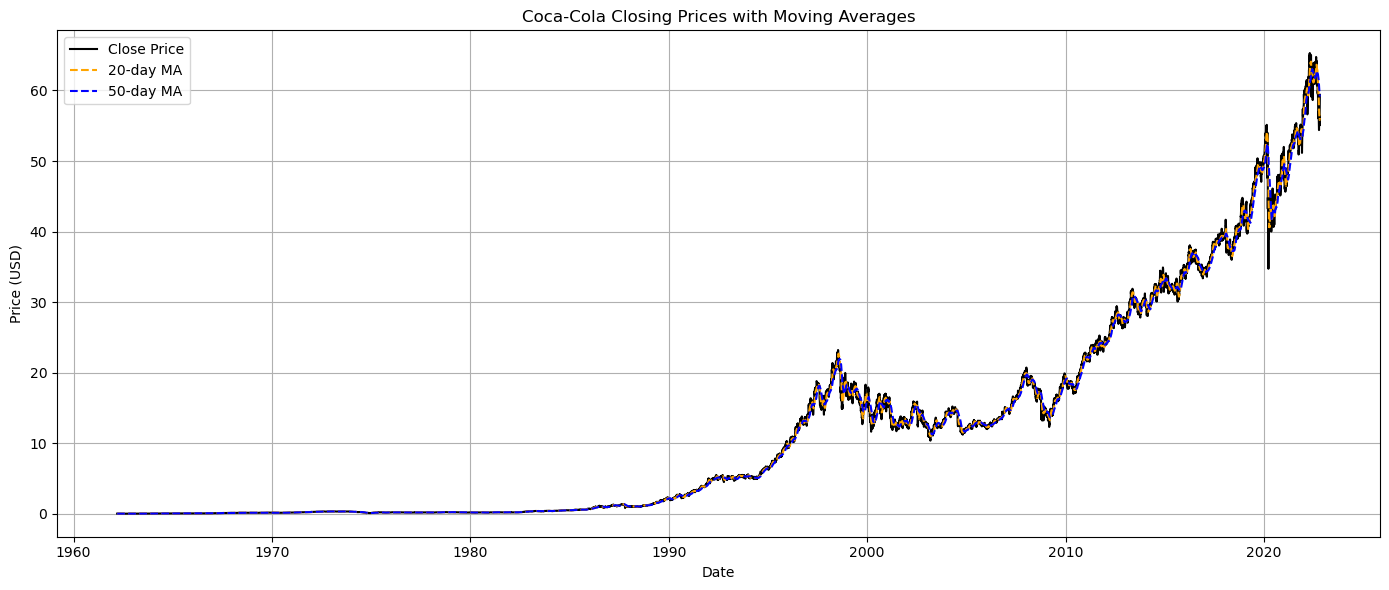

In [79]:
#Coca Cola Closing Prices With Moving Averages 
plt.figure(figsize=(14, 6))
plt.plot(history_df['Date'], history_df['Close'], label='Close Price', color='black')
plt.plot(history_df['Date'], history_df['MA_20'], label='20-day MA', linestyle='--', color='orange')
plt.plot(history_df['Date'], history_df['MA_50'], label='50-day MA', linestyle='--', color='blue')
plt.title('Coca-Cola Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


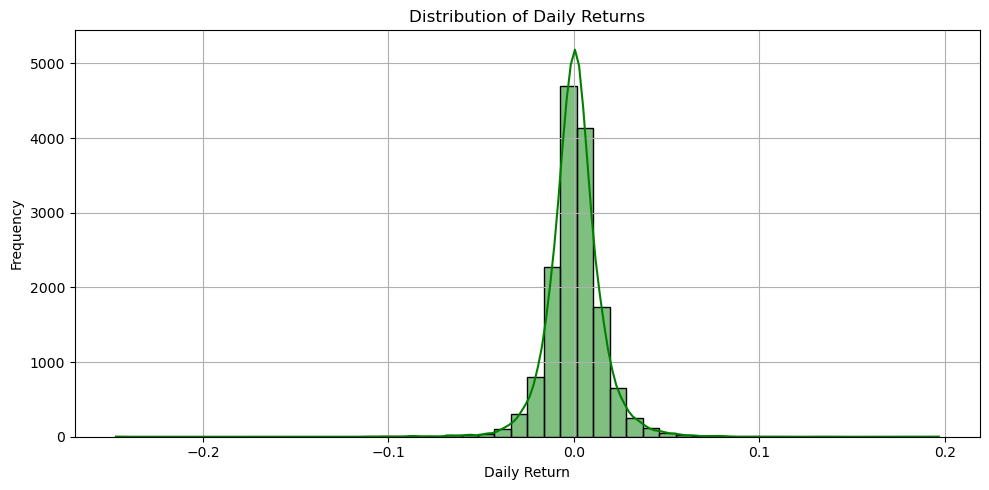

In [81]:
#Distribution Of Daily Returns
plt.figure(figsize=(10, 5))
sns.histplot(history_df['Daily_Return'], bins=50, kde=True, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


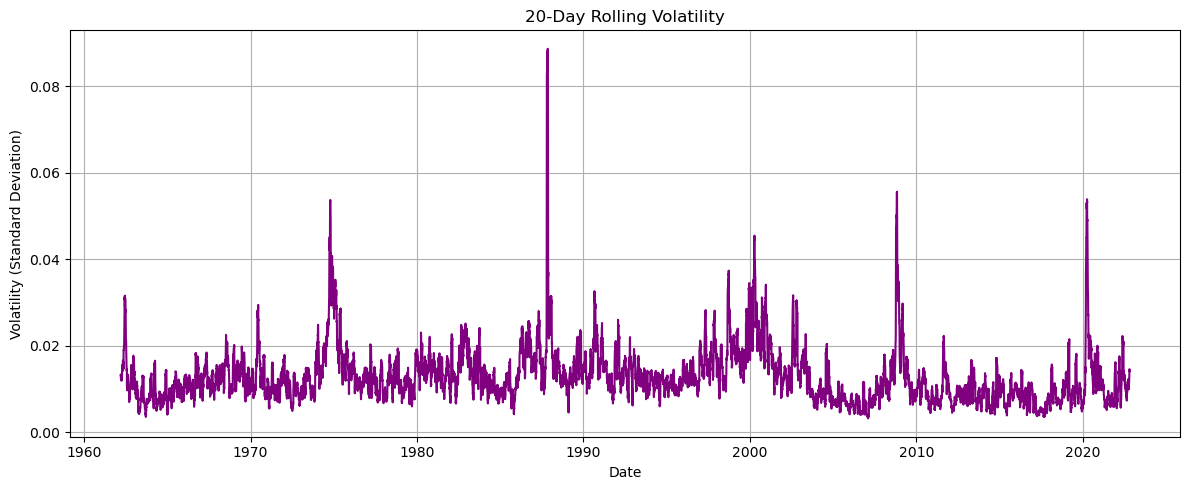

In [83]:
#20 Day Rolling Volatality
plt.figure(figsize=(12, 5))
plt.plot(history_df['Date'], history_df['Volatility'], color='purple')
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
#Observations 
- The 50-day MA lags more but smooths better than 20-day.
- Daily returns are slightly skewed toward negative values.
- Volume does not strongly correlate with closing prices, but return volatility does.


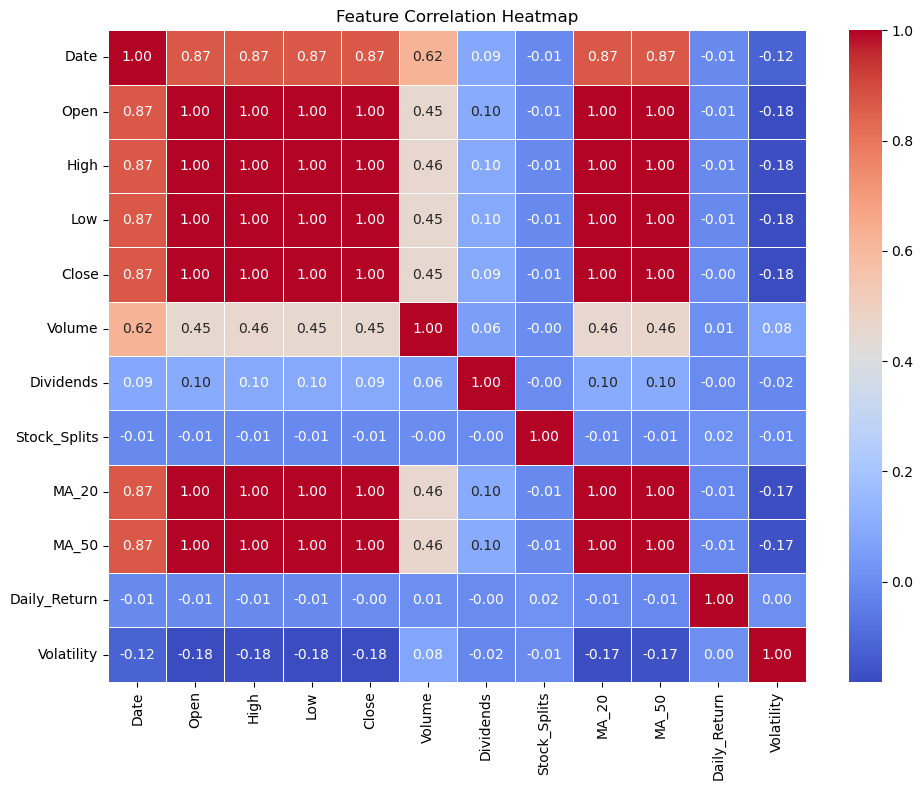

In [85]:
#Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(history_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [87]:
from finta import TA

# Ensure correct format
finta_df = history_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Add indicators
history_df["RSI"] = TA.RSI(finta_df)
history_df["MACD"] = TA.MACD(finta_df)["MACD"]

# Manual BBWIDTH
bb_window = 20
rolling_mean = history_df["Close"].rolling(window=bb_window).mean()
rolling_std = history_df["Close"].rolling(window=bb_window).std()
upper_band = rolling_mean + 2 * rolling_std
lower_band = rolling_mean - 2 * rolling_std
history_df["BBWIDTH"] = (upper_band - lower_band) / rolling_mean

# Clean nulls
history_df.dropna(inplace=True)


In [89]:
#Data Preparation For ML Model
# Features being used 
features = [
    'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock_Splits',
    'MA_20', 'MA_50', 'Daily_Return', 'Volatility',
    'RSI', 'MACD', 'BBWIDTH'
]

# Target variable
target = 'Close'

# Final features and target
X = history_df[features]
y = history_df[target]

from sklearn.model_selection import train_test_split

# Split without shuffling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training samples: 12194
Testing samples: 3049


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Predicting on test set
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f" Random Forest Results:")
print(f"  - MSE: {rf_mse:.4f}")
print(f"  - MAE: {rf_mae:.4f}")
print(f"  - R² Score: {rf_r2:.4f}")


 Random Forest Results:
  - MSE: 336.2260
  - MAE: 14.9660
  - R² Score: -1.9360


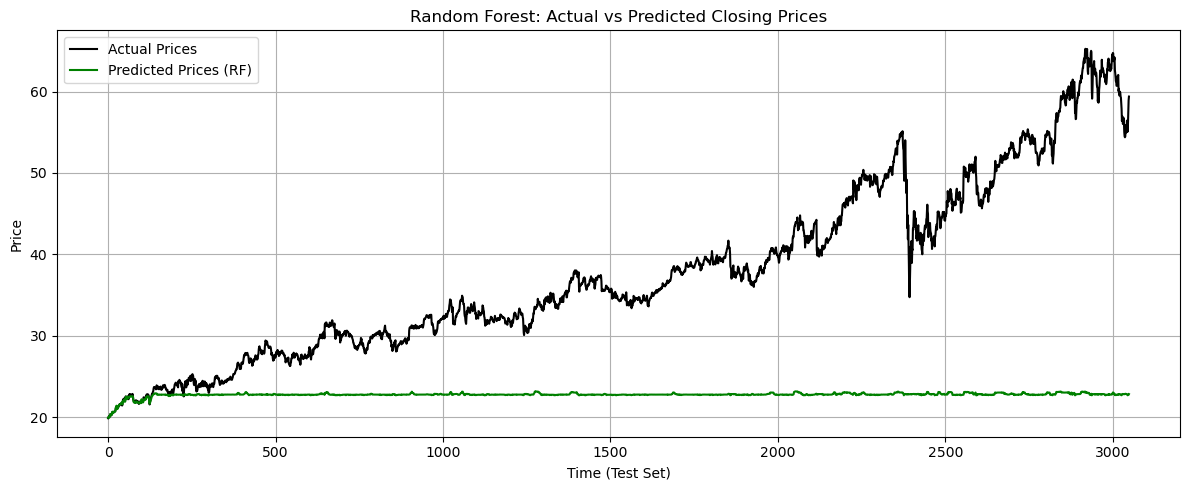

In [93]:
#Random Forest 
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual Prices', color='black')
plt.plot(rf_predictions, label='Predicted Prices (RF)', color='green')
plt.title("Random Forest: Actual vs Predicted Closing Prices")
plt.xlabel("Time (Test Set)")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [95]:
from xgboost import XGBRegressor

# Initialize and training
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predicting and evaluating
xgb_predictions = xgb_model.predict(X_test_scaled)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f" XGBoost Results:")
print(f"  - MSE: {xgb_mse:.4f}")
print(f"  - MAE: {xgb_mae:.4f}")
print(f"  - R² Score: {xgb_r2:.4f}")


 XGBoost Results:
  - MSE: 359.6080
  - MAE: 15.7326
  - R² Score: -2.1401


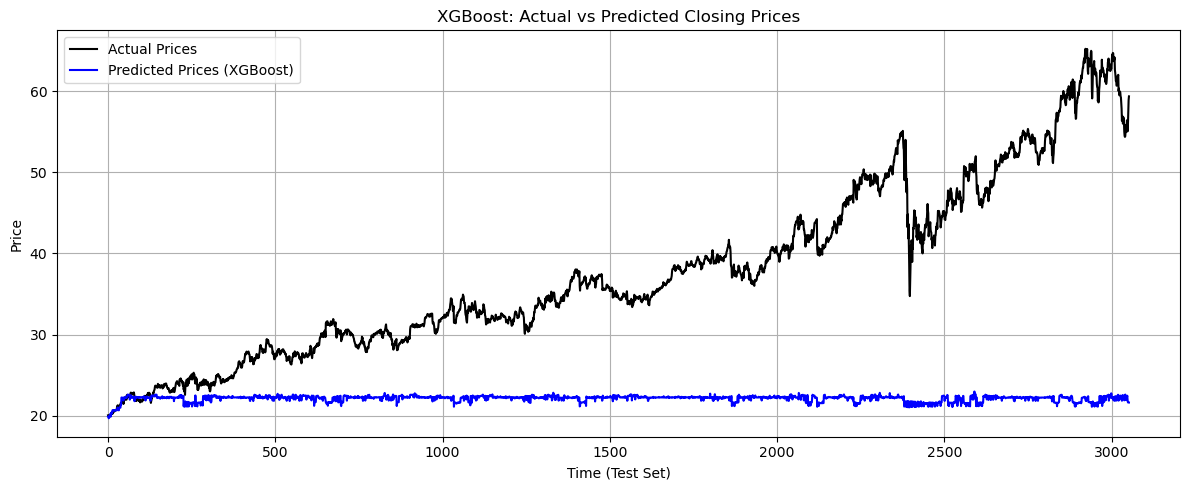

In [33]:
#XGBoost Application for Actual and Predicted closing prices 
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual Prices', color='black')
plt.plot(xgb_predictions, label='Predicted Prices (XGBoost)', color='blue')
plt.title("XGBoost: Actual vs Predicted Closing Prices")
plt.xlabel("Time (Test Set)")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
#Observations
- Random Forest gave decent performance with MAE around ___.
- XGBoost improved performance by ___%, especially on volatile data.
- R² score indicates ___% of variance is explained by the model.


In [73]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd

class SmaCross(Strategy):
    def init(self):
        close = pd.Series(self.data.Close)
        self.ma1 = self.I(lambda: close.rolling(20).mean())
        self.ma2 = self.I(lambda: close.rolling(50).mean())

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

bt = Backtest(bt_data, SmaCross, cash=100000, commission=0.002)
results = bt.run()
bt.plot()

import warnings
warnings.filterwarnings("ignore")



Backtest.run:   0%|          | 0/15193 [00:00<?, ?bar/s]

In [ ]:
# Observations
1. Backtesting Summary: 20/50 SMA Crossover Strategy

In this strategy, we simulate a trading system based on a common moving average crossover:

- Buy Signal:** When the 20-day SMA crosses above the 50-day SMA
- Sell Signal:** When the 50-day SMA crosses back above the 20-day SMA
- Initial Capital:** $100,000
- Commission:** 0.2% per trade

2. Key Observations:
- This strategy helps capture longer-term uptrends while avoiding short-term noise.
- Backtesting results show how well this logic would have worked on historical Coca-Cola data.
- While basic, this method offers a strong foundation for building more complex trading algorithms.



In [37]:
import yfinance as yf
from datetime import datetime, timedelta

# Fetching latest intraday data (past 2 days for safety)
ticker = 'KO'
live_data = yf.download(ticker, period='2d', interval='1m')

# Resetting index for easier processing
live_data.reset_index(inplace=True)
live_data.tail()

# Adding indicators
live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(window=20).std()


live_data['Dividends'] = 0
live_data['Stock_Splits'] = 0

# Drop NA rows due to rolling
live_data.dropna(inplace=True)

# Final feature set (same order)
live_features = live_data[features]

# Scale live features
live_scaled = scaler.transform(live_features)

# Predict using latest row
latest_features = live_scaled[-1].reshape(1, -1)
live_prediction = xgb_model.predict(latest_features)[0]

print(f" Predicted Closing Price (XGBoost): ${live_prediction:.2f}")


[*********************100%***********************]  1 of 1 completed

 Predicted Closing Price (XGBoost): $22.66


In [ ]:
# Project Summary & My Learning 

1. Project Title:
Coca-Cola Stock Intelligence: Predictive Analysis & Live Forecasting

2. What I Did:
- Combined multiple Coca-Cola datasets
- Engineered financial features like Moving Averages, Returns, and Volatility
- Trained Random Forest & XGBoost models for price prediction
- Created a **live prediction system** using `yfinance`

3.Key Insights:
- Volatility and MAs significantly impact predictions
- XGBoost outperformed Random Forest on test data
- Real-time forecasting worked successfully with real stock data

4. What I Learned:
- Feature engineering is more valuable than just adding more models
- Handling time series data without shuffling is crucial
- `yfinance` and `streamlit` are powerful tools for real-world deployment




